In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# EDA

In [ ]:
happiness = pd.read_csv('2019.csv')

In [ ]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happiness.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

According to the correlation plot below, GDP, social support, and life expectancy contribute most significantly to the happiness score. 

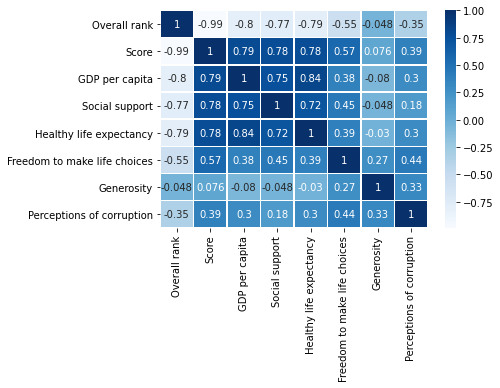

In [ ]:
corr = happiness.loc[:, happiness.columns != 'Country or region'].corr()

sns.heatmap(corr, annot=True, linewidths=.5, cmap="Blues")

In [ ]:
fig = px.treemap(happiness, names='Country or region', values='Healthy life expectancy', color='Country or region', hover_data=['Healthy life expectancy'])
fig.update_layout(title='Treemap of HLE 2019')

# Model

I will implement several machine learning algorithms to predict a country's happiness score. 

The models include:

1.   Multiple Linear Regression
2.   Support Vector Regression
3.   Decision Tree Regression
4.   Random Forest Regression

We will first split our data into training (80%) and testing (20%) data. 



**Multiple Linear Regression**

In [ ]:
X = happiness.iloc[:, 3:]
y = happiness['Score']

features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

Text(0.5, 1.0, 'Multiple Linear Regression')

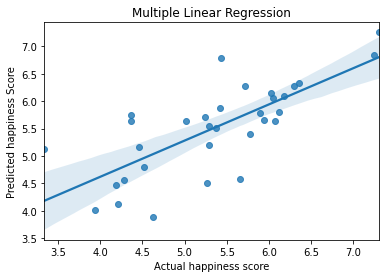

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lrPrediction = lr.predict(X_test)

ax = sns.regplot(y_test, lrPrediction)
ax.set(xlabel="Actual happiness score", ylabel = "Predicted happiness Score")
ax.set_title('Multiple Linear Regression')

In [ ]:
print(lr.intercept_)
print(lr.coef_)

1.713623629829581
[0.62905037 1.02996793 1.41142141 1.49769308 0.77660357 1.42122181]


In [ ]:
print('Result of Linear Regression Model')

print('\nMean Absolute Error: %.2f'
      % mean_absolute_error(y_test, lrPrediction))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(mean_squared_error(y_test, lrPrediction)))

Result of Linear Regression Model

Mean Absolute Error: 0.46
Root Mean Squared Error: 0.65


**Support Vector Regression**

Text(0.5, 1.0, 'Support Vector Regression')

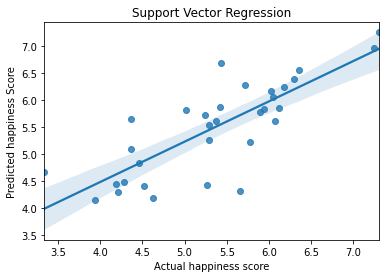

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

svrPrediction = svr.predict(X_test)

ax = sns.regplot(y_test, svrPrediction)
ax.set(xlabel="Actual happiness score", ylabel = "Predicted happiness Score")
ax.set_title('Support Vector Regression')

In [ ]:
print('Result of SVR Model')

print('\nMean Absolute Error: %.2f'
      % mean_absolute_error(y_test, svrPrediction))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(mean_squared_error(y_test, svrPrediction)))

Result of Linear Regression Model

Mean Absolute Error: 0.43
Root Mean Squared Error: 0.58


**Decision Tree Regression**

Text(0.5, 1.0, 'Decision Tree Regression')

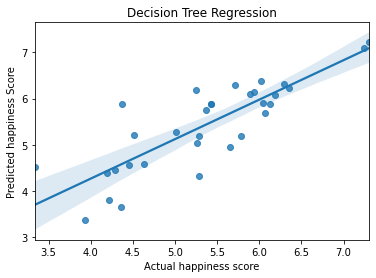

In [ ]:
dt =  DecisionTreeRegressor()
dt.fit(X_train, y_train)

dtPrediction = dt.predict(X_test)

ax = sns.regplot(y_test, dtPrediction)
ax.set(xlabel="Actual happiness score", ylabel = "Predicted happiness Score")
ax.set_title('Decision Tree Regression')

In [ ]:
print('Result of Decision Tree Regression Model')

print('\nMean Absolute Error: %.2f'
      % mean_absolute_error(y_test, dtPrediction))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(mean_squared_error(y_test, dtPrediction)))

Result of Decision Tree Regression Model

Mean Absolute Error: 0.41
Root Mean Squared Error: 0.54


In [ ]:
tree.plot_tree(dt)

**Random Forest Regression**

Text(0.5, 1.0, 'Random Forest Regression')

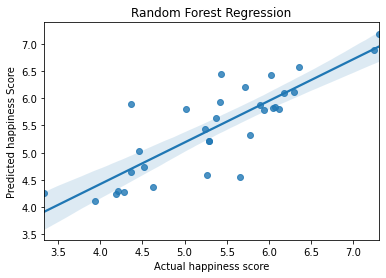

In [ ]:
rf= RandomForestRegressor(random_state=0)

rf.fit(X_train, y_train)

rfPrediction = rf.predict(X_test)

ax = sns.regplot(y_test, rfPrediction)
ax.set(xlabel="Actual happiness score", ylabel = "Predicted happiness Score")
ax.set_title('Random Forest Regression')

In [ ]:
print('Result of Random Forest Regression Model')

print('\nMean Absolute Error: %.2f'
      % mean_absolute_error(y_test, rfPrediction))
print('Root Mean Squared Error: %.2f'
      % np.sqrt(mean_squared_error(y_test, rfPrediction)))

Result of Random Forest Regression Model

Mean Absolute Error: 0.38
Root Mean Squared Error: 0.52
